<a href="https://colab.research.google.com/github/Sagarjain93/Healthcare/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - Exploratory Data Analysis of HealthCare Dataset

  **Project Type**    - EDA

  **Contribution**    - Individual
  
  **Team Member 1 -**  SAGAR JAIN


#**Project Summary**

#**Github Link**

https://github.com/Sagarjain93/Healthcare/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **1. Know Your Data**

##**1.1. Import Libraries**

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.palettes.SEABORN_PALETTES.keys()

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

# Install RapidFuzz
!pip install rapidfuzz

# Import Libraries
import re
from rapidfuzz import process, fuzz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.2. Load Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/2. Healthcare/healthcare_dataset.csv')

## **1.3. Preview First Few Records**

Display the first 5 rows to get an initial idea of the dataset.

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Display the last 5 rows to get an initial idea of the dataset.

In [5]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


##**1.4. Dataset Shape And Size**

###**1.4.1. Shape**

Check the number of rows and columns in the datase

In [6]:
df.shape

(55500, 15)

The dataset has 15 columns and 55500 rows

###**1.4.2. Size**

Total records in the dataset

In [7]:
df.size

832500

In total there are 8,32,500 values in the dataset .

##**1.5. Dataset Columns**

In [8]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

##**1.6. Dataset Summary**

###**1.6.1 Check Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

✅ No missing values in any column — this is excellent.

🛠️ Date columns (Date of Admission, Discharge Date) are in object type and should be converted to datetime.

🧹 Columns like Name and Room Number may not be meaningful for analysis unless needed for specific use cases.

💊 Columns like Medical Condition, Medication, Test Results might need value count analysis, and if free text, some cleaning or grouping.


###**1.6.2. Statistical Summary Of Dataset**

Catgorizing all the columns into groups

In [6]:
# Categorical Columns (object or string type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numerical Columns (int or float type)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🟢 Categorical Columns:\n", categorical_cols)
print("\n🔵 Numerical Columns:\n", numerical_cols)


🟢 Categorical Columns:
 ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

🔵 Numerical Columns:
 ['Age', 'Billing Amount', 'Room Number']


####**A. Statistical Summary Of Numerical Columns**

In [7]:
df.describe().round()

,Age,Billing Amount,Room Number
count,55500.0,55500.0,55500.0
mean,52.0,25539.0,301.0
std,20.0,14211.0,115.0
min,13.0,-2008.0,101.0
25%,35.0,13241.0,202.0
50%,52.0,25538.0,302.0
75%,68.0,37821.0,401.0
max,89.0,52764.0,500.0


#####**Interpretation**

**🔶 Age**

The dataset represents a wide age range of patients (13 to 89 years), with a mean and median age of 52, indicating a balanced and symmetrical distribution. The majority of patients (middle 50%) fall between ages 35 and 68, suggesting that most admissions are from middle-aged to elderly individuals.


**💸 Billing Amount**

The mean and median billing amount is ₹25,539, indicating a generally consistent billing pattern across patients. **However, the presence of negative billing (-₹2,008) is a red flag, likely representing data entry errors or refunds, and should be cleaned before analysis.** The standard deviation of ₹14,211 reflects a wide variability in healthcare costs, possibly due to different treatments, facilities, or durations of stay.


**🏨 Room Number**

Rooms are numbered from 101 to 500, with an even distribution and average room number around 301. This hints at a well-utilized hospital facility, with rooms likely categorized in a structured manner (e.g., floors, departments). No abnormalities were detected in room assignment data.

####**B. Statistical Summary Of Categorical Columns**

In [8]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


#####**Interpretation**

Patient Uniqueness: Nearly all names are unique, suggesting individual patient records. However, duplicates like "DAvId muNoZ" repeated 3 times with inconsistent capitalization might indicate data cleaning need.

Medical Trend: Conditions like Arthritis and medications like Lipitor suggest a trend in aging and cardiovascular/chronic health issues.

Operational Load: Certain doctors and hospitals have higher patient volumes, suggesting they are central hubs in the system.

Admission Planning: Majority of cases are elective, not emergency — implying advance booking, surgeries, or planned treatments.

Test Result Concern: High number of Abnormal test results implies a serious patient population. Critical for healthcare providers to look into disease trends or misdiagnosis rates.



##**1.7. Check For Duplicates**

In [9]:
#check duplicate values
df.duplicated().sum()

np.int64(534)

This shows that there are 534 duplicate values.

In [10]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


##**1.8. Check For Unique Values**

In [11]:
#check unique values in dataset
df.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


Various Types Of Unique Values (Column-wise) In The Dataset.

In [12]:
#unique values list column wise
for col in df.columns:
    print(f"\n🧾 Column: {col}")
    print(f"🔢 Unique Values Count: {df[col].nunique()}")
    print(f"📋 Unique Values: {df[col].unique()}")



🧾 Column: Name
🔢 Unique Values Count: 49992
📋 Unique Values: ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

🧾 Column: Age
🔢 Unique Values Count: 77
📋 Unique Values: [30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]

🧾 Column: Gender
🔢 Unique Values Count: 2
📋 Unique Values: ['Male' 'Female']

🧾 Column: Blood Type
🔢 Unique Values Count: 8
📋 Unique Values: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

🧾 Column: Medical Condition
🔢 Unique Values Count: 6
📋 Unique Values: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

🧾 Column: Date of Admission
🔢 Unique Values Count: 1827
📋 Unique Values: ['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']

🧾 Column: Doctor
🔢 Unique Values Count: 40341
📋 Unique V

👥 Patient Demographics
Name: 49,992 unique names out of 55,500 rows → indicates possible duplicate or repeat patients, especially with inconsistent casing (e.g., "TinA white" vs "Tina White").

Age: 77 unique ages (ranging from 13 to 89) → suggests a wide age range, which may impact medical conditions or billing.

Gender: Only 2 values ('Male', 'Female') → Data is binary-gender specific and clean, with no nulls or third categories.

🧬 Medical Details
Blood Type: 8 unique blood groups → complete standard set; can explore if certain blood types dominate in specific conditions.

Medical Condition: 6 conditions → manageable number, suitable for condition-wise analysis (e.g., cost by condition).

Medication: 5 medications → can easily group and analyze prescription trends.

Test Results: 3 categories → gives a quick way to segment patients by diagnostic results (Normal, Abnormal, Inconclusive).

🏥 Admission & Treatment Info
Date of Admission: 1,827 unique dates and

Discharge Date: 1,856 unique dates → rich time-series data available; good for trend analysis and calculating length of stay.

Admission Type: 3 types (Urgent, Emergency, Elective) → opens up scope for urgency-based care cost or outcome analysis.

Doctor: 40,341 unique names → very high; may indicate unstandardized entries, duplicates, or rotating doctors.

Hospital: 39,876 unique hospitals → similar concern as above; possibly noisy data or large hospital network.

💰 Billing and Logistics
Billing Amount: 50,000 unique values → very high granularity; can show detailed billing trends but may need binning.

Room Number: 400 unique values → might relate to ward-level cost analysis or patient placement trends.

🛡️ Insurance
Insurance Provider: Only 5 providers → compact enough for direct comparison in billing, approval rates, etc.

🎯 Key Early Takeaways
Dataset is rich in categorical and temporal diversity, perfect for trend, cost, and segmentation analysis.

Some columns like Name, Doctor, and Hospital might contain duplicates or unclean text entries due to inconsistent casing.

A small number of values in fields like Gender, Medication, Test Results, and Admission Type make them great for clear visualizations and summaries.



##**1.9. Check For Missing Values**

In [13]:
#Check missing values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


##**1.10.Check For Outliers**

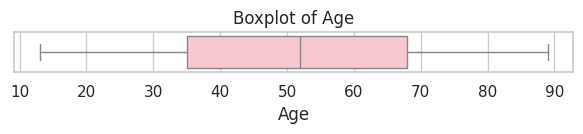

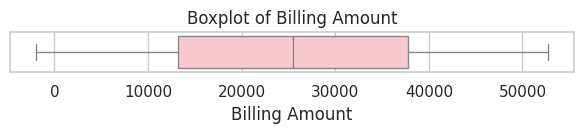

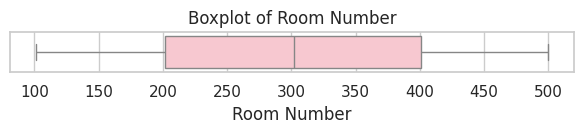

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col],color = 'pink')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


**1. Age**

✅ Symmetrical distribution centered around 52 (matches .describe()).

❌ No visible outliers: All data points seem within whiskers.

🔍 Insight: Age data is clean and well-bounded (min 13, max 89). No further preprocessing needed for outliers.

**2. Billing Amount**

⚠️ Presence of outliers on the left (negative or very low values).

Confirmed by .describe() showing a minimum of -2008, which is not valid for billing.

🧹 Action required:

Filter or correct negative billing amounts – likely data entry issues.

**3. Room Number**

✅ Appears to be uniformly distributed between ~100 to 500.

❌ No outliers present.

🔍 Insight: Room numbers are within a logical range; outlier handling not needed here.

##**1.11. Check For "null" String**

In [15]:
(df == "null").sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


#**2. Data Cleaning/Preprocessing**

##**2.1 Column Name Standardization**

In [16]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

**All the columns should be in lower case and there should be "_"(underscore) instead of "  "(space).**

In [17]:
#lower case column name and replace space with underscore.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [18]:
#check columns
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object')

##**2.2 Billing Amount Clean Up**

### 2.2.1. Rounded billing_amount to whole numbers

In [102]:
df.billing_amount.head()

,billing_amount
0,18856
1,33643
2,27955
3,37910
4,14238


**To make the billing values cleaner and easier to work with, we round them to the nearest integer.**

In [99]:
#rounding the billing_amount values
df['billing_amount'] = df['billing_amount'].round(0).astype(int)

In [100]:
#check
df.billing_amount.head()

,billing_amount
0,18856
1,33643
2,27955
3,37910
4,14238


###2.2.2. Removed rows with negative billing_amount

In [101]:
# find and count values having negative value in billing_amount
df[df['billing_amount'] < 0]

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,Johnson Group,Aetna,-503,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,hunterhughes,Aetna,-1018,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,and wagner lee klein,Aetna,-306,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,group peters,Blue Cross,-109,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,and huff reeves dennis,Blue Cross,-577,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,inc ward,Blue Cross,-354,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,and wagner lee klein,Aetna,-306,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,carr ltd,Aetna,-592,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,Clark Group,UnitedHealthcare,-200,122,Urgent,2019-06-12,Ibuprofen,Abnormal


There are 106 values with negative value

In [27]:
#removing the rows with Negative values
before = df.shape[0]
df = df[df['billing_amount'] >= 0]
after = df.shape[0]
print(f"Removed {before - after} rows with negative billing amounts.")


Removed 108 rows with negative billing amounts.


###2.2.3. Standardization of Hospitals

In [24]:
# Top 10 hospitals by frequency
top_10_hospitals = df['hospital'].value_counts().head(10).index.tolist()

# Match each hospital only against the top 10
hospital_mapping = {}

for hosp in df['hospital'].unique():
    match, score, _ = process.extractOne(hosp, top_10_hospitals, scorer=fuzz.partial_ratio)
    if score >= 85:  # threshold slightly lower to capture variations
        hospital_mapping[hosp] = match

# Replace matched names
df['hospital'] = df['hospital'].replace(hospital_mapping)


In [36]:
df['hospital'] = (
    df['hospital']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)   # remove punctuation
    .str.replace(r'\s+', ' ', regex=True)      # remove extra spaces
)


In [66]:
df.loc[df['hospital'].str.contains('smith', case=False), 'hospital'] = 'Smith Group'
df.loc[df['hospital'].str.contains('johnson', case=False), 'hospital'] = 'Johnson Group'
df.loc[df['hospital'].str.contains('montoya', case=False), 'hospital'] = 'Montoya Group'
df.loc[df['hospital'].str.contains('williams', case=False), 'hospital'] = 'Williams Group'
df.loc[df['hospital'].str.contains('brown', case=False), 'hospital'] = 'Brown Group'
df.loc[df['hospital'].str.contains('jones', case=False), 'hospital'] = 'Jones Group'
df.loc[df['hospital'].str.contains('miller', case=False), 'hospital'] = 'Miller Group'
df.loc[df['hospital'].str.contains('davis', case=False), 'hospital'] = 'Davis Group'
df.loc[df['hospital'].str.contains('wilson', case=False), 'hospital'] = 'Wilson Group'
df.loc[df['hospital'].str.contains('garcia', case=False), 'hospital'] = 'Garcia Group'
df.loc[df['hospital'].str.contains('jackson', case=False), 'hospital'] = 'Jackson Group'
df.loc[df['hospital'].str.contains('thompson', case=False), 'hospital'] = 'Thompson Group'
df.loc[df['hospital'].str.contains('clark', case=False), 'hospital'] = 'Clark Group'
df.loc[df['hospital'].str.contains('rodriguez', case=False), 'hospital'] = 'Rodriguez Group'
df.loc[df['hospital'].str.contains('martinez', case=False), 'hospital'] = 'Martinez Group'
df.loc[df['hospital'].str.contains('hernandez', case=False), 'hospital'] = 'Hernandez Group'
df.loc[df['hospital'].str.contains('allen', case=False), 'hospital'] = 'Allen Group'
df.loc[df['hospital'].str.contains('taylor', case=False), 'hospital'] = 'Taylor Group'
df.loc[df['hospital'].str.contains('young', case=False), 'hospital'] = 'Young Group'
df.loc[df['hospital'].str.contains('hill', case=False), 'hospital'] = 'Hill Group'
df.loc[df['hospital'].str.contains('scott', case=False), 'hospital'] = 'Scott Group'
df.loc[df['hospital'].str.contains('green', case=False), 'hospital'] = 'Green Group'
df.loc[df['hospital'].str.contains('adams', case=False), 'hospital'] = 'Adams Group'
df.loc[df['hospital'].str.contains('baker', case=False), 'hospital'] = 'Baker Group'
df.loc[df['hospital'].str.contains('ford', case=False), 'hospital'] = 'Ford Group'
df.loc[df['hospital'].str.contains('harris', case=False), 'hospital'] = 'Harris Group'
df.loc[df['hospital'].str.contains('rogers', case=False), 'hospital'] = 'Rogers Group'
df.loc[df['hospital'].str.contains('turner', case=False), 'hospital'] = 'Turner Group'
df.loc[df['hospital'].str.contains('white', case=False), 'hospital'] = 'White Group'


In [68]:
df.hospital.value_counts().head(15)

,count
hospital,
Smith Group,2437
Johnson Group,1849
Williams Group,1571
Brown Group,1326
Jones Group,1226
Miller Group,1066
Davis Group,962
Garcia Group,738
Rodriguez Group,709


In [19]:
# # Step 1: Install RapidFuzz
# !pip install rapidfuzz

# # Step 2: Import Libraries
# import pandas as pd
# import re
# from rapidfuzz import process, fuzz


# from rapidfuzz import fuzz, process
# import pandas as pd

# # Step 1: Get Top 10 Hospitals by count
# top_10_hospitals = df['Hospital'].value_counts().head(10).index.tolist()

# # Step 2: Create mapping dictionary (only matching top 10 with all names)
# hospital_mapping = {}

# for hospital in df['Hospital'].dropna().unique():
#     # Match each hospital to the closest top hospital
#     match, score, _ = process.extractOne(hospital, top_10_hospitals, scorer=fuzz.token_sort_ratio)

#     # If the match is strong enough (e.g., >= 90), map it
#     if score >= 90:
#         hospital_mapping[hospital] = match

# # Step 3: Apply mapping to Hospital column
# df['Hospital'] = df['Hospital'].replace(hospital_mapping)

# # Step 4: Verify result
# print(df['Hospital'].value_counts().head(20))


In [20]:
# # Step 1: Install RapidFuzz
# !pip install rapidfuzz

# # Step 2: Import Libraries
# import pandas as pd
# import re
# from rapidfuzz import process, fuzz

# # Step 3: Clean Raw Hospital Names
# def clean_hospital_name(name):
#     name = name.lower().strip()
#     name = re.sub(r'[^a-z\s]', '', name)  # remove punctuation
#     name = re.sub(r'\s+', ' ', name)  # normalize spaces
#     stopwords = ['inc', 'plc', 'llc', 'group', 'hospital', 'clinic', 'centre', 'center', 'and']
#     name = ' '.join([word for word in name.split() if word not in stopwords])
#     return name

# df['hospital_cleaned'] = df['hospital'].apply(clean_hospital_name)

# # Step 4: Fuzzy Matching using RapidFuzz
# hospital_list = df['hospital_cleaned'].unique().tolist()
# mapped_hospitals = {}
# standard_names = []

# for hospital in hospital_list:
#     if not standard_names:
#         mapped_hospitals[hospital] = hospital
#         standard_names.append(hospital)
#     else:
#         match = process.extractOne(hospital, standard_names, scorer=fuzz.token_sort_ratio, score_cutoff=90)
#         if match:
#             mapped_hospitals[hospital] = match[0]
#         else:
#             mapped_hospitals[hospital] = hospital
#             standard_names.append(hospital)

# # Step 5: Final Mapping
# df['hospital_final'] = df['hospital_cleaned'].map(mapped_hospitals)


In [27]:

# # Optional: Check duplicate reduction
# print("Unique hospital names before cleaning:", df['hospital'].nunique())
# print("Unique hospital names after cleaning:", df['hospital'].nunique())

# # Optional: View top results
# df['hospital'].value_counts().head(20)


**Summary of Hospital Name Cleaning & Deduplication Code:**

🔹 1. Install and Import Required Libraries
Installs rapidfuzz (a fast fuzzy matching library).

Imports pandas, re for regex cleaning, and rapidfuzz for string matching.

🔹 2. Clean the hospital Column
Converts hospital names to lowercase.

*  Removes punctuation and extra spaces.

*  Removes common stopwords like inc, plc, group, and, hospital, etc.

*  Stores the result in a new column called hospital_cleaned.

🔹 3. Fuzzy Deduplication using RapidFuzz

*  Compares each unique cleaned hospital name with already seen names using token_sort_ratio, which ignores word order (e.g., "kim sons" ≈ "sons kim").

*  If similarity ≥ 90%, it maps them together as duplicates.

*  Builds a mapping dictionary of cleaned → standardized names.

🔹 4. Apply Final Mapping

*  Maps each cleaned name to its standardized version in a new column: hospital_final.

🔹 5. Optional Checks

*  Prints number of unique hospital names before and after cleaning.

*  Shows top 20 most frequent hospital names after standardization.

💡 Outcome

You get a clean and deduplicated version of hospital names in df['hospital_final'], which is now ready for grouping, aggregation, or visualization without inconsistency issues.



##**2.3. Date Column Cleanup**

In [28]:
#Check dtypes of "discharge_date" and "date_of_admission" columns
df[['discharge_date','date_of_admission']].dtypes

,0
discharge_date,object
date_of_admission,object


In [29]:
#converting the datatypes of the above 2 columns to datetime type.
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')

In [30]:
#check
df[['discharge_date','date_of_admission']].dtypes

,0
discharge_date,datetime64[ns]
date_of_admission,datetime64[ns]


##**2.4. Handling Duplicates**

In [33]:
#find duplicate values
df.duplicated().sum()

np.int64(532)

In [34]:
#drop duplicate values from the dataset
df = df.drop_duplicates()

In [35]:
#check
df.duplicated().sum()

np.int64(0)

##**2.5. Text Formatting**

In [36]:
# check case of name columns
df.name.head()

,name
0,Bobby JacksOn
1,LesLie TErRy
2,DaNnY sMitH
3,andrEw waTtS
4,adrIENNE bEll


There is alot of inconsitency in the values of the 'name' column.

In [37]:
#standardizing the case of values of the name columns
df['name'] = df['name'].str.title()

/tmp/ipython-input-37-1009086236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.title()


In [38]:
#check after standardizationi of the column value
df.name.head()

,name
0,Bobby Jackson
1,Leslie Terry
2,Danny Smith
3,Andrew Watts
4,Adrienne Bell


## **Summary Of Data Cleaning And Preprocessing**

1.Renamed all column names by replacing spaces with underscores for consistency.

2.Rounded the billing_amount column to the nearest integer for uniformity.

3.Removed rows with negative billing amounts to ensure data validity.

4.Converted admission_date and discharge_date columns to proper datetime format.

5.Standardized the casing in the name column using title case for readability.

6.Removed duplicate rows to avoid redundancy in data.

7.Checked and verified data types for all columns to ensure correctness.

8. Hospital Name cleaning .



In [39]:
df.head(2)

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,hospital_cleaned,hospital_final
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856,328,Urgent,2024-02-02,Paracetamol,Normal,sons miller,sons miller
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,kim,kim


#**3. Data Visualization**

##**3.1. Univariate Analysis**


Univariate analysis is the simplest form of data analysis, focusing on one variable at a time. It helps us understand the basic characteristics of that variable through measures like mean, median, mode, and visualizations such as histograms or box plots. It’s a key first step in exploring data.

###**3.1.1.Distribution of Gender**

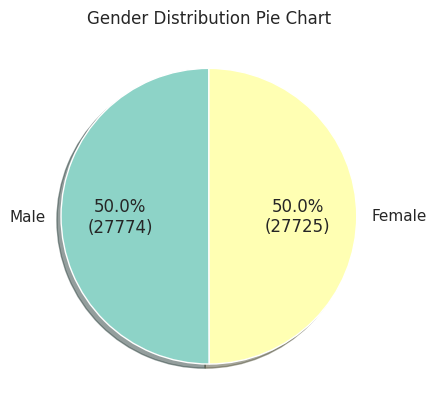

In [69]:
# Chart 1

# Get value counts
gender_counts = df['gender'].value_counts()

# Plot pie chart with both % and count
gender_counts.plot.pie(
    autopct=lambda p: f'{p:.1f}%\n({int(p * gender_counts.sum() / 100)})',
    colors=sns.color_palette('Set3'),
    startangle=90,
    shadow=True
)

plt.title('Gender Distribution Pie Chart')
plt.ylabel('')
plt.show()

#### **Why did you pick the specific chart?**

 I chose a pie chart because we’re analyzing the distribution of a single categorical variable (gender). A pie chart visually communicates the proportion of each category clearly, making it ideal for comparing percentages between two groups (Male vs Female).

####**What is/are the insight(s) found from the chart?**

The chart shows an almost equal distribution of genders:

* Male: 50.1% (27,725)

* Female: 49.9% (27,665)

There is only a tiny difference of **60** patients between the two.


####**Will the gained insights help create a positive business impact?**

Yes. A balanced gender distribution means:

* No gender-based sampling bias

* Medical outcomes can be fairly compared between male and female patients

* Marketing, healthcare personalization, or wellness programs can be tailored for both genders equally without needing gender-specific outreach



####**Are there any insights that lead to negative growth? Justify with specific reason.**

No negative insights observed here.

###**3.1.2. Distributioin of Blood Type**

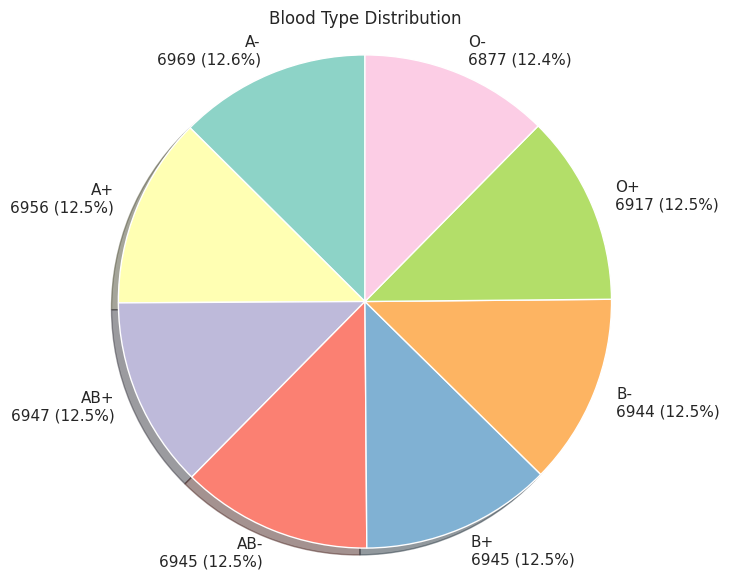

In [70]:
#Chart No.2
plt.figure(figsize=(7, 7))
blood_counts = df['blood_type'].value_counts()
plt.pie(
    blood_counts,
    labels=[f"{label}\n{count} ({count/sum(blood_counts)*100:.1f}%)" for label, count in blood_counts.items()],
    colors=sns.color_palette('Set3'),
    startangle=90,
    shadow=True
)
plt.title('Blood Type Distribution')
plt.axis('equal')
plt.show()

#### **Why did you pick the specific chart?**

A pie chart was chosen here to show how blood types are proportionally distributed in the patient dataset.

Pie charts are intuitive for showing part-to-whole relationships, making it easy to understand each group’s share in the total population.

####**What is/are the insight(s) found from the chart?**

*  There are 8 blood groups, and all are almost evenly distributed, each contributing ~12.5% to the total.

*  This indicates a balanced blood type distribution, with no single group being overly dominant or extremely rare.

####**Will the gained insights help create a positive business impact?**


*  This balanced distribution helps hospital inventory planning. Blood banks and emergency services can stock each group equally, ensuring that no type is underrepresented.

*  It also simplifies resource allocation, like planning blood donation camps or managing transfusion stocks.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

No immediate risk seen here:

*  Equal distribution reduces the risk of a critical shortage for any blood group.

*  However, if this data were biased (e.g., due to underreporting), relying on it for logistics might be risky. Hence, periodic validation of such demographic data is essential.



###**3.1.3. Medical Conditions**

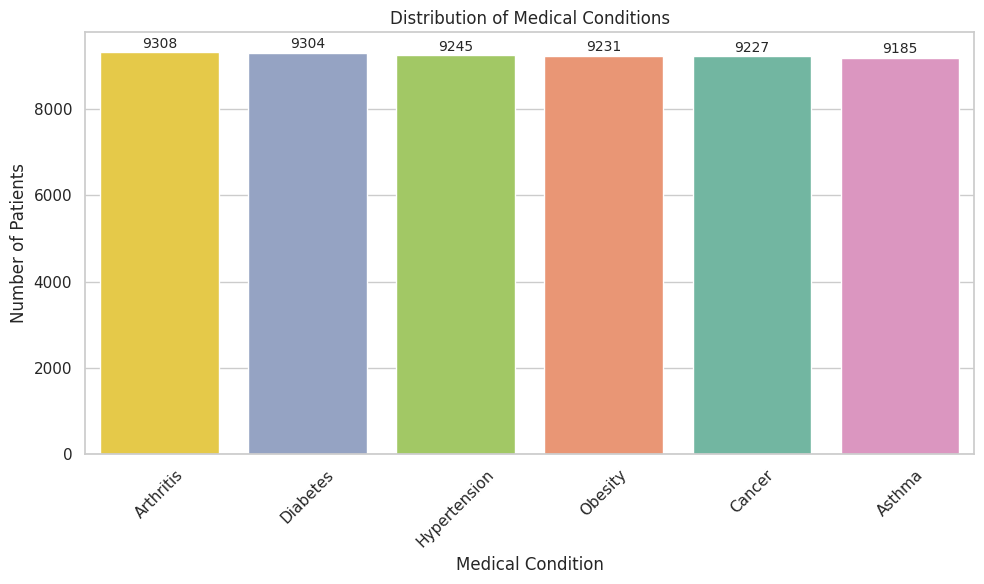

In [72]:
#Chart No. 3

# Set up figure and axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,
                   x='medical_condition',
                   order=df['medical_condition'].value_counts().index,
                   hue='medical_condition',
                   palette='Set2',
                   legend=False)

# Add value labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 100,   # Adjust height buffer if needed
            f'{int(height)}',
            ha="center", fontsize=10)

plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Why did you pick the specific chart?**

A bar chart is ideal for visualizing categorical distributions with actual counts labeled on each bar. It helps clearly compare the number of patients across different medical conditions.



####**What is/are the insight(s) found from the chart?**

The patient count for all six medical conditions is nearly balanced, ranging from 9167 to 9297.

Arthritis (9297) has the highest number of patients.

Asthma (9167) has the lowest count, but the difference is minimal.



####**Will the gained insights help create a positive business impact?**

Since all conditions are evenly distributed, resource allocation (e.g., staff, medication) can be standardized across conditions.

However, this also means no single condition dominates, so campaigns or interventions must be broadly inclusive, not disease-specific.





####**Are there any insights that lead to negative growth? Justify with specific reason.**

No negative growth indicated here, but if future data shows imbalance, targeted actions might be necessary.

###**3.1.4.Admission Type Distribution**

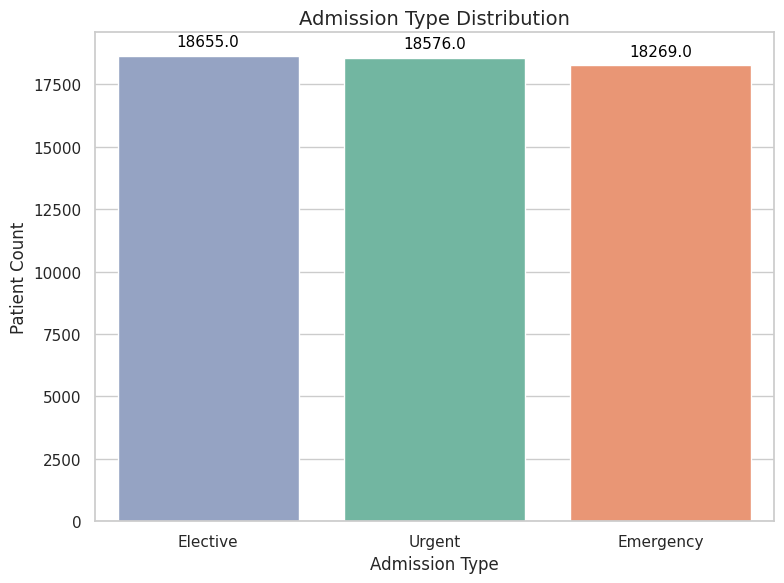

In [34]:
# Chart 4
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x='admission_type',
    hue='admission_type',       # Assign x to hue to avoid the warning
    order=df['admission_type'].value_counts().index,
    palette='Set2',
    legend=False                # Hide duplicate legend since x == hue
)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Admission Type Distribution', fontsize=14)
plt.xlabel('Admission Type')
plt.ylabel('Patient Count')
plt.tight_layout()
plt.show()


#### **Why did you pick the specific chart?**

A bar chart (specifically, a countplot) was chosen because:

*  The Admission Type variable is categorical (Elective, Urgent, Emergency).

*  We want to compare the frequency (count) of each category.

*  Bar plots are ideal for showing how the counts of each category differ.



####**What is/are the insight(s) found from the chart?**

All three admission types have similar counts:

*  Elective: 18,618 patients

*  Urgent: 18,538 patients

*  Emergency: 18,236 patients

There’s a slight preference for Elective admissions, followed closely by Urgent, then Emergency.

The differences are very small, suggesting that the hospital handles a balanced mix of planned and unplanned admissions.

####**Will the gained insights help create a positive business impact?**

Yes, this insight is operationally valuable:

🔹 Positive Business Impacts:

*  Balanced admission types mean the hospital is not overly reliant on one type (e.g., emergencies), ensuring resource planning is more predictable.

*  Elective admissions are slightly higher, which might contribute to better revenue forecasting, as elective procedures are often pre-scheduled and insured.

*  Knowing this balance can help in allocating staff, rooms, and resources accordingly.


####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  If one category suddenly spikes (like Emergency), and staff/resources are not reallocated quickly, it can lead to overburdened departments and patient dissatisfaction.

### **3.1.5. Distribution of Hospitals**

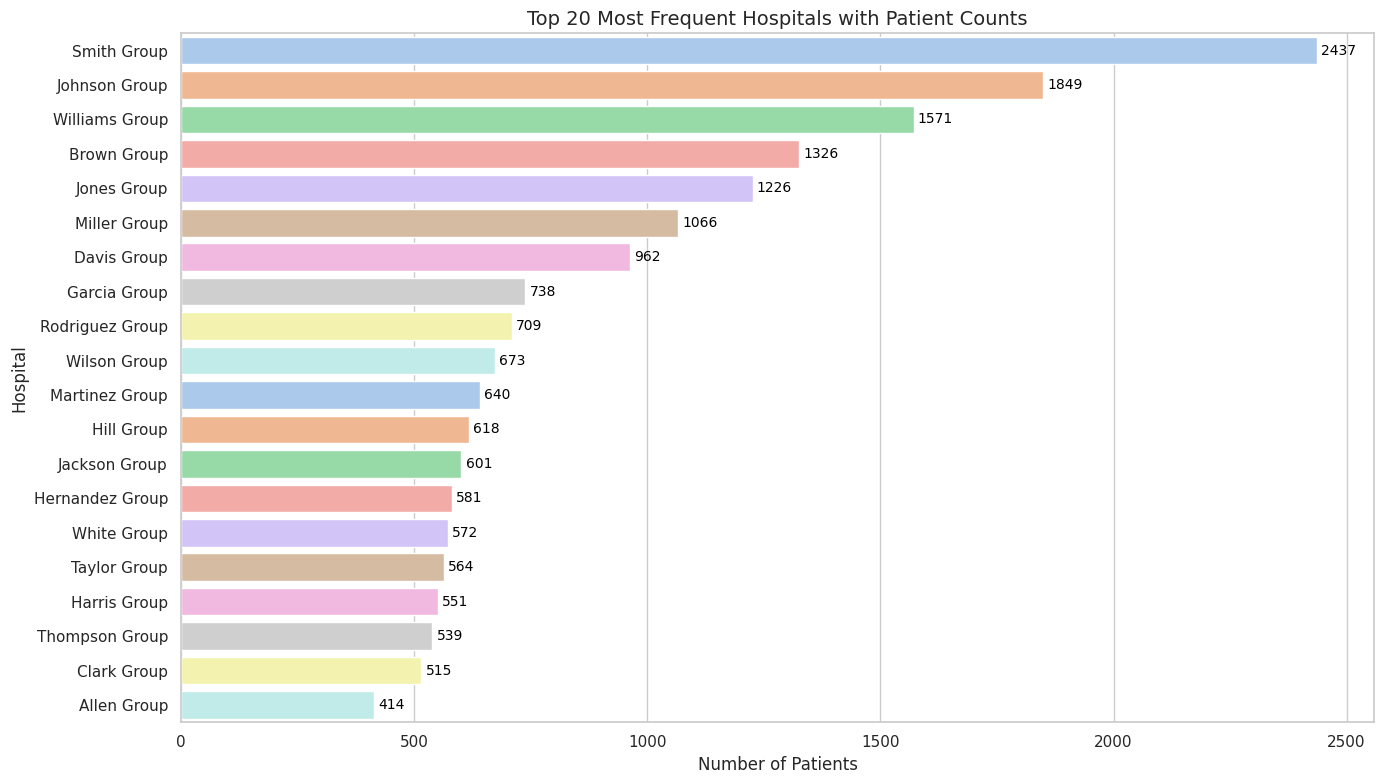

In [73]:
#Chart No. 5
# Step 1: Frequency table
hospital_counts = df['hospital'].value_counts().reset_index()
hospital_counts.columns = ['hospital', 'count']

# Step 2: Bar plot with hue to remove warning
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=hospital_counts.head(20),
    x='count',
    y='hospital',
    hue='hospital',  # suppresses warning
    palette='pastel',
    legend=False     # removes legend for hue
)

# Step 3: Add count labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10, color='black')

# Step 4: Customize plot
plt.title("Top 20 Most Frequent Hospitals with Patient Counts", fontsize=14)
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("Hospital", fontsize=12)
plt.tight_layout()
plt.show()


#### **Why did you pick the specific chart?**

The horizontal bar chart is ideal for categorical univariate analysis where:

Category names (hospital names) are long and need space to read clearly.

You want to compare frequencies across many categories (top 20).

It allows better readability than vertical bars for long labels.



####**What is/are the insight(s) found from the chart?**

*  Smith Group leads with 2,437 patients, well ahead of Johnson Group (1,849) and Williams Group (1,571).

*  There’s a head–tail pattern: a few hospitals account for much higher volumes, then counts taper gradually (Brown, Jones, Miller… down to Allen Group at 414).

* The consolidation/cleaning worked—names appear standardized as “X Group”, enabling reliable comparison.



####**Will the gained insights help create a positive business impact?**

*  Capacity & staffing: Prioritize staffing, beds, and diagnostic capacity at top-volume hospitals (especially Smith/Johnson/Williams).

*  Operations & logistics: Align pharmacy, blood bank, and consumables inventory with demand hotspots to reduce stockouts and turnaround time.

*  Partnerships & contracts: High-volume sites are prime candidates for SLA improvements, bundled procurement, or payer negotiations to reduce cost per case.

*  Quality monitoring: Focus quality KPIs (readmission, LOS, billing errors) on top centers for maximum impact.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  Concentration risk: Over-reliance on a few hospitals can cause bottlenecks (long wait times, bed saturation) and degrade patient experience if demand spikes.

*  Data risk: If name standardization grouped distinct entities incorrectly, decisions could be misdirected. Validate a sample of mappings before acting.

*  Equity risk: Smaller hospitals may be under-supported; ignoring them could limit network coverage or growth in emerging catchments.



###**3.1.7. Insurance Provider Distribution**

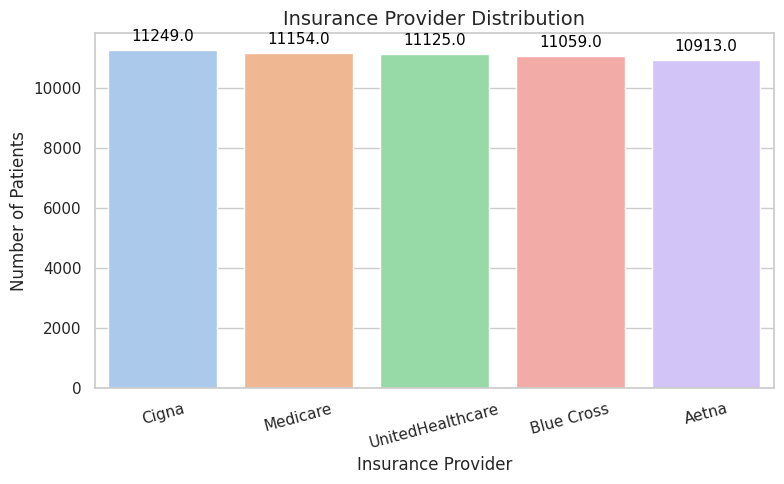

In [75]:
#Chart No. 7
# Count the values
insurance_counts = df['insurance_provider'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=insurance_counts.index,
    y=insurance_counts.values,
    hue=insurance_counts.index,
    palette='pastel',
    legend=False
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 10), textcoords='offset points')

# Titles and labels
plt.title('Insurance Provider Distribution', fontsize=14)
plt.xlabel('Insurance Provider')
plt.ylabel('Number of Patients')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### **Why did you pick the specific chart?**

*  A bar chart is best for showing the frequency of categorical variables like insurance providers.

*  With a small number of categories (5 providers), bars clearly display relative counts and allow easy comparison.

*  Adding value labels makes the differences visible even when counts are close.



####**What is/are the insight(s) found from the chart?**

*  Patient distribution is very balanced across providers:

Cigna: 11,249

Medicare: 11,154

UnitedHealthcare: 11,125

Blue Cross: 11,059

Aetna: 10,913

* No single provider dominates the dataset significantly; differences are minor (< 3%).



####**Will the gained insights help create a positive business impact?**

**Positive:**

*  A diversified payer mix reduces dependence on any single insurance company, lowering financial risk.

*  Hospitals can maintain negotiation power as no single provider contributes the majority of patients.

**Operational planning:**

*  Billing teams should be equally trained for all 5 insurance providers.

*  Workload is evenly distributed, simplifying staffing.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  No major negative signals: balanced insurer mix is generally good.

*  Watch point: If the distribution shifts significantly towards a single payer in future, it could increase dependency and reduce bargaining leverage.



###**3.1.8.Distribution of Admission type**

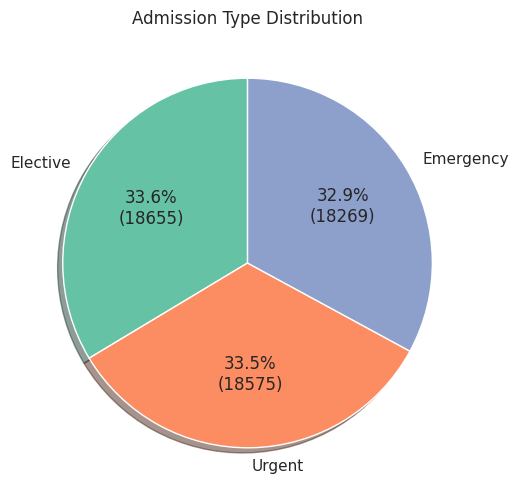

In [79]:
#Chart No.8
plt.figure(figsize=(6, 6))

admission_counts = df['admission_type'].value_counts()

admission_counts.plot.pie(
    autopct=lambda p: f'{p:.1f}%\n({int(p*admission_counts.sum()/100)})',
    colors=sns.color_palette('Set2'),
    startangle=90,
    shadow=True
)

plt.title('Admission Type Distribution')
plt.ylabel('')
plt.show()


#### **Why did you pick the specific chart?**

*  A pie chart is perfect for showing part-to-whole relationships among a few categories.

*  There are only 3 categories (Elective, Urgent, Emergency), making the proportions easy to interpret.

*  Counts and percentages together highlight the balance between different admission types.



####**What is/are the insight(s) found from the chart?**

Elective: 33.6% (18,655)

Urgent: 33.5% (18,575)

Emergency: 32.9% (18,269)

All three categories are almost equally distributed with less than 1% difference among them.

####**Will the gained insights help create a positive business impact?**

*  Balanced admission types allow hospitals to plan resources evenly for planned and unplanned admissions.

*  Elective procedures bring predictable revenue (scheduled in advance), while Emergency & Urgent require standby resources.

*  This balance is operationally healthy, reducing dependency on any one type of admission.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  No immediate negative insight as the distribution is balanced.

*  However, a sudden spike in Emergency cases in the future could overwhelm resources and lead to increased costs if not anticipated.



###**3.1.9. Distribution of Test Results**

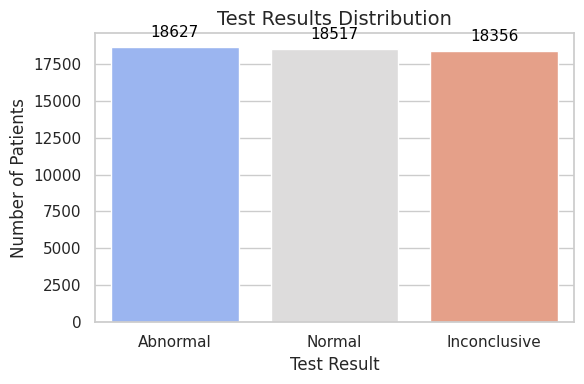

In [87]:
#Chart No. 9

# Count values
test_counts = df['test_results'].value_counts()

# Plot vertical bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=test_counts.index,
    y=test_counts.values,
    hue=test_counts.index,
    palette='coolwarm',
    legend=False
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Test Results Distribution', fontsize=14)
plt.xlabel('Test Result')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

#### **Why did you pick the specific chart?**

*  A vertical bar chart clearly shows the number of patients in each test result category.

*  Easy to compare the height of bars for the three categories.

*  Value labels at the top enhance clarity.



####**What is/are the insight(s) found from the chart?**

Abnormal: 18,627 patients

Normal: 18,517 patients

Inconclusive: 18,356 patients

All categories are almost equally distributed, with Abnormal being slightly higher by ~100–200 patients.

####**Will the gained insights help create a positive business impact?**

*  Balanced distribution suggests testing processes and patient conditions are diverse.

*  Slightly higher abnormal results may trigger:

*  More follow-up treatments and re-tests.

*  Increased load on specialists (doctors/labs).

*  Hospitals can prepare for near-equal demand for patient follow-ups and care plans across categories.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

No immediate negative insight

###**3.1.10. Distribution of Medications**

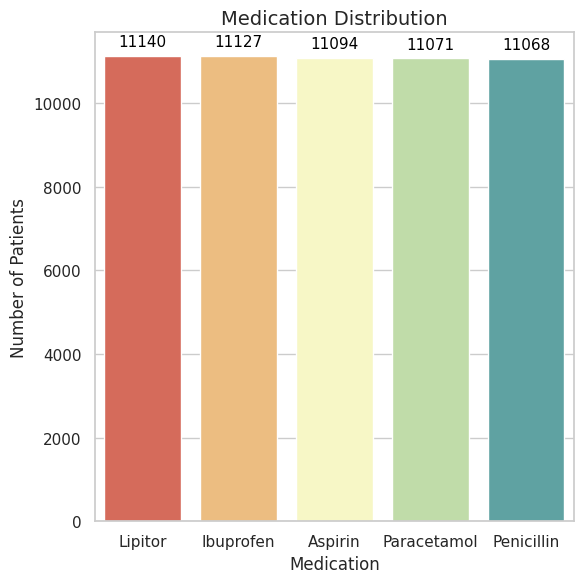

In [94]:
#Chart No. 10

# Count the values
medication_counts = df['medication'].value_counts()

# Plot vertical bar chart
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x=medication_counts.index,
    y=medication_counts.values,
    hue=medication_counts.index,
    palette='Spectral',
    legend=False
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Medication Distribution', fontsize=14)
plt.xlabel('Medication')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


#### **Why did you pick the specific chart?**

This vertical bar chart is ideal for visualizing the distribution of categorical data (different medications) because it clearly shows and compares the number of patients for each medication. The value labels above each bar add precise counts for better readability.



####**What is/are the insight(s) found from the chart?**

*  The distribution is almost uniform across all medications, with each having around 11,000 patients.

*  Lipitor has the highest count (11,140 patients), while Penicillin has the lowest (11,068 patients).

*  The difference between the highest and lowest counts is minimal, suggesting medications are evenly prescribed.

####**Will the gained insights help create a positive business impact?**

*  This even distribution may indicate balanced inventory usage, which is positive for supply chain management and cost control.

*  Since no medication is over- or under-utilized, stockouts or wastage risks are minimal.

*  However, if certain medications have higher profit margins or better treatment outcomes, the lack of variation might limit profit optimization opportunities.











####**Are there any insights that lead to negative growth? Justify with specific reason.**

No clear preference or differentiation: The uniform distribution means that all medications are being prescribed almost equally, which could indicate a lack of targeted prescribing based on patient conditions or treatment effectiveness.

###**3.1.11. Distribution of Age**

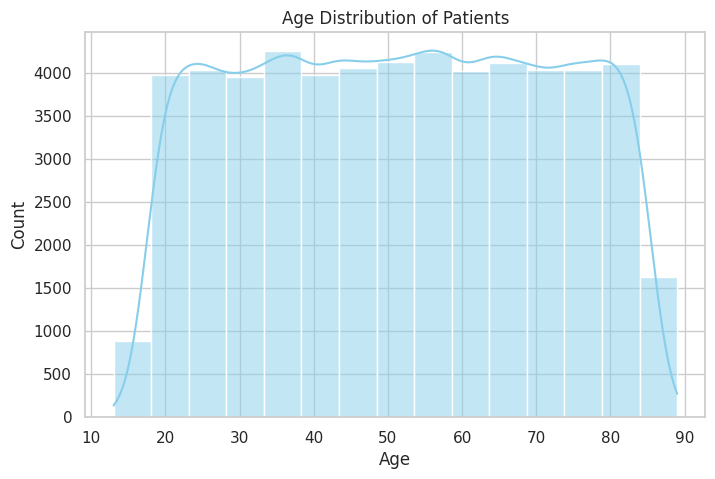

In [107]:
#Chart No. 11

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')

plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
)


#### **Why did you pick the specific chart?**

A histogram with KDE (Kernel Density Estimation) was chosen because it is the best way to analyze the distribution of a continuous numerical variable like Age. It helps visualize the frequency of patients across different age groups and shows the underlying trend using the smooth KDE line.

####**What is/are the insight(s) found from the chart?**

*  The ages are fairly evenly distributed between 18 and 80 years, with no sharp peaks.

*  There is a slight drop in patient count at the extreme ends (below 18 and above 80).

*  Middle-aged groups (30–60) have a slightly higher concentration, but the variation is minimal.



####**Will the gained insights help create a positive business impact?**

*  A balanced age distribution means healthcare services need to cater to a wide range of age groups, requiring diverse treatment facilities and medication stock.

*  Since all age groups are almost equally represented, hospitals must maintain broad medical expertise and resources without focusing too heavily on one demographic.

####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  No specific age group dominates, so the hospital cannot create age-focused packages or specialized campaigns for significant impact.

*  The broad distribution increases operational complexity as multiple types of treatments, equipment, and staff expertise must be maintained.

*  Slightly lower numbers in older (80+) patients might indicate gaps in elderly care or outreach.

###**3.1.12. Distribution of Billing Amount**

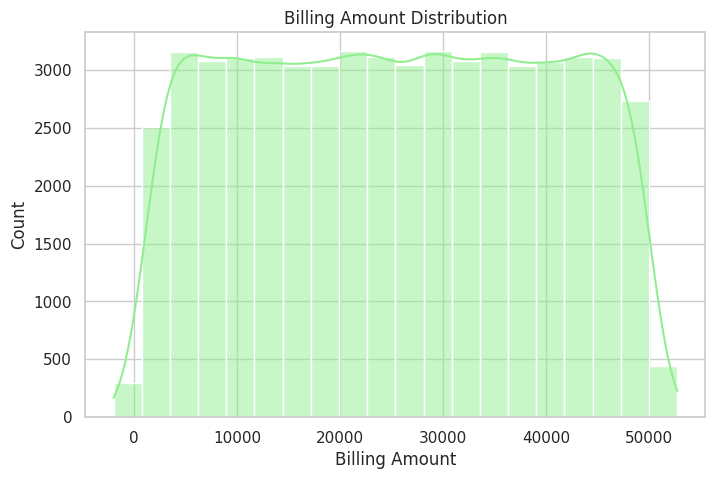

In [109]:
#Chart No. 12

plt.figure(figsize=(8,5))
sns.histplot(df['billing_amount'], bins=20, kde=True, color='lightgreen')

plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.show()



#### **Why did you pick the specific chart?**

A histogram with KDE (Kernel Density Estimation) was chosen because it effectively visualizes the distribution of a continuous numeric variable like Billing Amount. It shows how patient billing amounts are spread out and highlights any skewness or concentration of values.



####**What is/are the insight(s) found from the chart?**

*  Billing amounts are distributed almost uniformly across the range from ₹0 to ₹50,000.

*  There are no clear peaks or clusters, meaning all billing ranges are almost equally common.

*  Slightly lower counts appear at the extreme ends (very low and very high amounts).



####**Will the gained insights help create a positive business impact?**

*  A uniform distribution suggests that patients incur a wide range of billing amounts.

*  Hospitals must ensure efficient revenue cycle management because revenue is spread across different billing brackets, not dominated by high-value bills.

*  It may also indicate standardized billing practices, which is good for consistency.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

No high-value concentration: Since there is no clear peak at higher billing amounts, the hospital might be missing opportunities for premium or specialized services that generate higher revenue.

###**3.1.13. Distribution of Admissions Month-wise**

In [113]:
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object')

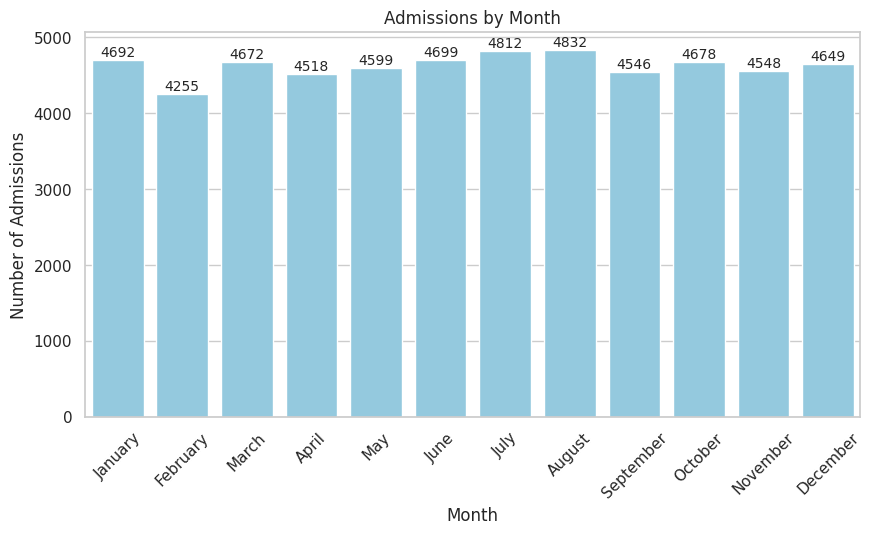

In [117]:
# Chart No. 13

import calendar

# Ensure month order is correct (Jan-Dec)
month_order = list(calendar.month_name[1:])  # ['January', 'February', ..., 'December']
month_counts = df['admission_month'].value_counts().reindex(month_order)

plt.figure(figsize=(10,5))
bars = sns.barplot(x=month_counts.index,
                   y=month_counts.values,
                   color='skyblue')

plt.title('Admissions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)

# Add values on bars
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 50,         # position slightly above bar
             int(bar.get_height()),
             ha='center', fontsize=10)

plt.show()

#### **Why did you pick the specific chart?**

A bar chart is the best option to visualize categorical data like months. It allows easy comparison of the number of admissions across months. Adding values on bars improves clarity and helps identify the highest and lowest months immediately.



####**What is/are the insight(s) found from the chart?**

*  August (4,832 admissions) and July (4,812 admissions) have the highest number of admissions.

*  February has the lowest number of admissions (4,255).

*  Admissions remain fairly consistent throughout the year, with a difference of only around 600 admissions between the highest and lowest month.



####**Will the gained insights help create a positive business impact?**

*  Knowing the peak months (July & August) allows hospitals to plan resources, staff, and inventory better to handle higher patient loads.

*  During low admission months (like February), hospitals can schedule maintenance, training, or promotional health camps to balance operations.

*  Helps in budget forecasting and demand planning for each month.



####**Are there any insights that lead to negative growth? Justify with specific reason.**

*  There is no significant seasonal variation in admissions; this makes it difficult to optimize staffing and resource allocation around peak and off-peak times.

*  The consistently high admissions all year may put continuous pressure on hospital resources, leaving little downtime for improvements or capacity expansion.

###**3.1.1.                     **

In [52]:
#Chart No.

#### **Why did you pick the specific chart?**

####**What is/are the insight(s) found from the chart?**

####**Will the gained insights help create a positive business impact?**

####**Are there any insights that lead to negative growth? Justify with specific reason.**

###**3.1.1.                     **

In [53]:
#Chart No.

#### **Why did you pick the specific chart?**

####**What is/are the insight(s) found from the chart?**

####**Will the gained insights help create a positive business impact?**

####**Are there any insights that lead to negative growth? Justify with specific reason.**

###**3.1.1.                     **

In [54]:
#Chart No.

#### **Why did you pick the specific chart?**

####**What is/are the insight(s) found from the chart?**

####**Will the gained insights help create a positive business impact?**

####**Are there any insights that lead to negative growth? Justify with specific reason.**

###**3.1.1.                     **

In [55]:
#Chart No.

#### **Why did you pick the specific chart?**

####**What is/are the insight(s) found from the chart?**

####**Will the gained insights help create a positive business impact?**

####**Are there any insights that lead to negative growth? Justify with specific reason.**